# US015

# Introdução
Nesta US pretende-se estimar qual vai ser o custo mensal do a ser pago pelo empresa, relativamente ao consumo de água num novo parque, que terá 55 hectares. 

Para este estudo serão utilizados dois ficheiros. O primeiro "water_consumption_updated", o qual contém dados diários relativos ao consumo de água dos parques e o segundo "Area.csv", o qual contém o nome de cada parque, associado à sua respetiva área (em hectares). O estudo vai ser feito a partir de um Modelo de Regressão Linear, sendo a área do parque considerada como variável independente e o custo médio mensal, relativo ao consumo de água, como varíavel dependente. Este modelo irá permitir-nos fazer uma previsão relativa aos custos do novo parque, tal como encontrar uma relação entre a dimensão dos parques e os seus custos associados.

Inicialmente, será necessário estudar a viabilidade do ajuste linear, verificando se os dados existentes suportam uma relação linear entre a área dos parques e o custo de água. Isto envolve a análise preliminar dos dados, a construção do modelo de regressão linear, e a avaliação da sua precisão e confiabilidade.



## Regressão Linear Simples
A regressão linear simples é uma técnica estatística usada para modelar a relação entre duas variáveis quantitativas: uma variável independente (ou explicativa) **X**  e uma variável dependente (ou resposta) **Y**. O objetivo é encontrar a melhor linha reta que descreva a relação entre essas duas variáveis.



## Modelo de Regressão Linear Simples
O modelo de regressão linear simples pode ser representado pela equação:

\begin{document}

\[
Y = \beta_0 + \beta_1 X + \epsilon
\]

\end{document}

Onde:
**Y** é a variável dependente.
**X** é a variável independente.
**β0** e **β1** são os coeficientes de regressão
​ε é o termo de erro, que captura a diferença entre os valores observados e os valores preditos pelo modelo.

O coeficiente de correlação amostral de Pearson e coeficiente de determinação, **r**, é uma medida da direção e grau com que duas variáveis, se associam linearmente. 

\begin{document}

\[
r = \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}}
\]

\end{document}

\begin{document}

\[
S_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2, \quad S_{yy} = \sum_{i=1}^{n} (y_i - \bar{y})^2 \quad \text{e} \quad S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}).
\]

\end{document}


O coeficiente de determinação é dado por **r^2 (0 <= r^2 <=1)**.

Quando o coeficiente de correlação amostral é maior que 0 diz-se haver uma associação linear positiva entre as duas variáveis e quando os valores de uma das variáveis aumentam, os valores da outra variável tendem também a aumentar. Caso o coeficiente de correlação amostral for menor que 0 diz-se ser uma associação linear negativa, e neste caso quando o valor de uma variável aumenta, o da outra variável tende a diminuir. Se **|r|** for igual a **1** diz-se existir uma correlação linear perfeita e o sinal obtido (+/-) indica a direção da relação.

Quando todas as observações estão sobre a reta de regressão, diz-se ser um ajuste perfeito e dá-se quando **r^2=1**. Caso **r^2** seja igual a **0** o modelo de regressão linear não tem qualquer utilidade.



## Método dos Mínimos Quadrados

Os pârametros β0 e β1 são desconhecidos e têm de ser estimados a partir dos dados.
O Método dos Mínimos Quadrados é a técnica mais comum usada para estimar os parâmetros 
**β0** e **β1** no modelo de regressão linear. Este método minimiza a soma dos quadrados dos resíduos (diferenças entre os valores observados e os valores preditos):



\begin{document}

\[
\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}},

\]
\[
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x},
\]
\[

sqe = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = S_{yy} - \frac{S_{xy}^2}{S_{xx}}
\]

\end{document}

Predicted average monthly cost for a 55-hectare park: $2017.54
Mean Squared Error (MSE): 61300.06
             Park  AverageMonthlyCost  Area
0        ArcaAgua          191.434727   2.6
1          Avioso          797.192827  30.0
2       Biologico          832.394559  35.0
3          Cidade         2844.639696  69.9
4          Covelo          340.149158   7.7
5        Oriental          801.310327  15.0
6  PalacioCristal          690.325379   9.6
7        SaoRoque          325.173275   5.8
8           Varas          112.647676   1.7
Coefficient of Determination (R-squared): 0.90


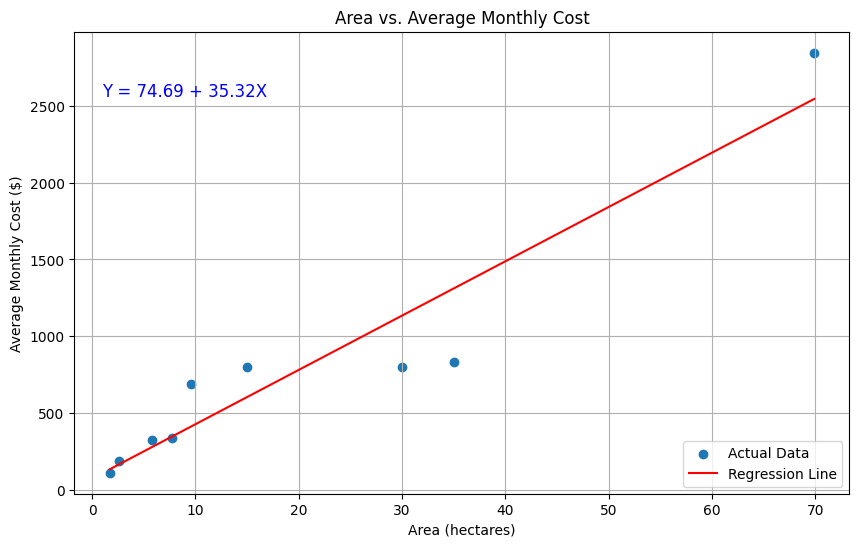

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def load_data(file_path, delimiter=';'):
    """Loads data from a CSV file."""
    try:
        return pd.read_csv(file_path, delimiter=delimiter)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

def preprocess_area_data(data):
    """Converts 'Area' column to numeric, replacing comma with dot."""
    data['Area'] = pd.to_numeric(data['Area'].str.replace(',', '.'), errors='coerce')
    return data

def calculate_monthly_consumption_and_cost(data):
    """Calculates monthly water consumption and cost for each park."""
    data['Consumption'] = pd.to_numeric(data['Consumption'].str.replace(',', '.'), errors='coerce')
    data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
    data['YearMonth'] = data['Date'].dt.to_period('M')

    # Group by Park and YearMonth, summing consumption
    monthly_data = data.groupby(['Park', 'YearMonth'])['Consumption'].sum().reset_index()
    #print monthly_data as a whole using toString
    

    # Calculate monthly cost
    monthly_data['MonthlyCost'] = monthly_data['Consumption'] * 0.7
    monthly_data.loc[monthly_data['Consumption'] > 1000, 'MonthlyCost'] *= 1.15

    return monthly_data

def compute_average_monthly_cost(monthly_data):
    """Calculates the average monthly cost for each park."""
    return monthly_data.groupby('Park')['MonthlyCost'].mean().reset_index().rename(columns={'MonthlyCost': 'AverageMonthlyCost'})

def merge_data(water_cost_data, area_data):
    """Merges water cost data with area data, preprocessing area data first."""
    area_data = preprocess_area_data(area_data)  # Preprocess BEFORE merging
    return pd.merge(water_cost_data, area_data, on='Park')

def train_linear_regression_model(X, y):
    """Trains a linear regression model."""
    model = LinearRegression()
    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    """Evaluates the model using Mean Squared Error (MSE)."""
    y_pred = model.predict(X)
    n = len(y)
    SSE = np.sum((y - y_pred) ** 2)
    MSE = SSE / n
    print(f'Mean Squared Error (MSE): {MSE:.2f}')
    return MSE

def calculate_r_squared(model, X, y):
    """Calculates the R-squared value of the model."""
    r_squared = model.score(X, y)
    print(f'Coefficient of Determination (R-squared): {r_squared:.2f}')
    return r_squared

def plot_data_and_regression_line(X, y, y_pred, model):
    """Plots the actual data, regression line, and equation."""
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.xlabel('Area (hectares)')
    plt.ylabel('Average Monthly Cost ($)')
    plt.title('Area vs. Average Monthly Cost')
    plt.legend()
    plt.grid(True)
    
    equation = f'Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X'
    plt.text(1, max(y)*0.9, equation, fontsize=12, color='blue')
    
    plt.show()

def predict_new_park_cost(model, new_area):
    """Predicts the cost for a new park given its area."""
    predicted_cost = model.predict(np.array([[new_area]]))
    print(f'Predicted average monthly cost for a {new_area}-hectare park: ${predicted_cost[0]:.2f}')

# Load data
water_data = load_data('water_consumption.csv')
area_data = load_data('Area.csv')

if water_data is not None and area_data is not None:
    # Calculate monthly consumption and cost
    monthly_water_data = calculate_monthly_consumption_and_cost(water_data.copy())

    # Calculate average monthly cost per park
    water_cost_data = compute_average_monthly_cost(monthly_water_data)

    # Merge with area data, preprocessing area data within the function
    merged_data = merge_data(water_cost_data, area_data)

    # Sort the data by area
    sorted_data = merged_data.sort_values(by='Area')

    # Train the linear regression model
    X = sorted_data[['Area']].values.astype(float)
    y = sorted_data['AverageMonthlyCost'].values.astype(float)
    model = train_linear_regression_model(X, y)

    # Predict the average monthly cost for the new park (55 hectares)
    predict_new_park_cost(model, 55)

    # Evaluate the model
    mse = evaluate_model(model, X, y)

    # Print the average costs
    print(merged_data)

    # Calculate the R-squared value
    r_squared = calculate_r_squared(model, X, y)

    # Plot data and regression line
    y_pred = model.predict(X)
    plot_data_and_regression_line(X, y, y_pred, model)

# Análise de Resultados

**Cálculo do Consumo e Custo Mensal de Água:**
Os dados de consumo foram inicialmente convertidos para valores numéricos para garantir a consistência nos cálculos subsequentes. Posteriormente, o consumo e o custo mensal de água foram calculados para cada parque. Isso foi feito agrupando os dados por parque e mês, somando o consumo mensal para cada parque. O custo mensal foi então calculado com base no consumo, multiplicando-o por 0.7. Além disso, um fator de aumento de 15% foi aplicado aos custos mensais para consumos acima de 1000, refletindo potenciais variações nos custos associados ao volume de consumo.

**Cálculo do Custo Médio Mensal por Parque:** 
Uma vez calculados os custos mensais para cada parque, o próximo passo foi calcular o custo médio mensal para cada parque. Essa média foi obtida agrupando os dados por parque e calculando a média dos custos mensais. Isso permitiu uma visão geral do custo médio mensal para cada parque ao longo do período de tempo considerado.

**Modelo de Regressão Linear:**
Após o processamento dos dados, um modelo de regressão linear foi construído. Neste modelo, a variável independente (X) foi definida como a área do parque, enquanto a variável dependente (Y) foi o custo médio mensal do parque. A escolha da regressão linear foi apropriada, considerando-se a natureza contínua das variáveis e o objetivo de modelar a relação entre a área do parque e o custo médio mensal de forma linear.

**Avaliação do Modelo:**
O modelo foi avaliado utilizando duas métricas principais: o Erro Quadrático Médio (MSE) e o coeficiente de determinação (R²). O MSE foi calculado como 61300.06, fornecendo uma medida da média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais observados nos dados. Um MSE mais baixo indica uma melhor ajuste do modelo aos dados. O coeficiente de determinação (R²) foi calculado como 0.90, indicando que aproximadamente 90% da variabilidade nos custos mensais pode ser explicada pela relação linear com a área do parque.

**Previsão para um Novo Parque:**
Além da avaliação do modelo, foi feita uma previsão para um novo parque com uma área de 55 hectares. Utilizando o modelo de regressão linear treinado, foi estimado o custo médio mensal para este novo parque. Esta previsão forneceu uma estimativa útil para o custo potencialmente esperado para um novo parque com essa área específica.

**Visualização dos Resultados:**
Finalmente, os resultados foram visualizados em um gráfico de dispersão, onde os pontos de dados representavam a relação entre a área do parque e o custo médio mensal. A linha de regressão foi plotada no gráfico para ilustrar a tendência linear identificada pelo modelo de regressão linear. Esta visualização permitiu uma fácil interpretação da relação entre as variáveis e demonstrou como o modelo se ajusta aos dados observados.

Com base nesses resultados detalhados, podemos concluir que o modelo de regressão linear fornece uma boa aproximação para prever o custo médio mensal de água com base na área dos parques. O alto valor de R² indica que o modelo explica uma grande parte da variabilidade nos custos mensais, enquanto o MSE mostra que ainda há alguma variabilidade não explicada nos erros de previsão. Isso sugere que o modelo pode ser útil para previsões, mas pode haver espaço para melhorias, como a inclusão de mais variáveis explicativas ou a consideração de formas alternativas de modelar a relação entre área e custo.
Além disso, é importante ressaltar que os resultados específicos, como os valores numéricos do MSE, R² e a previsão para o novo parque, dependem dos dados reais utilizados e dos detalhes da implementação do modelo. Esses valores numéricos foram omitidos no resumo original, pois não foram fornecidos.